# Self Organizing Maps (SOMs)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Data Preprocessing

In [ ]:
dataset = pd.read_csv("Credit_Card_Applications.csv")

In [ ]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
x = sc.fit_transform(x)


Training SOM

In [ ]:
!pip install minisom
from minisom import MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=2530fde72b534813615552b41e3be44738df1e677ac50188bfbc70bbf412a9f9
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [ ]:
som = MiniSom(x = 10, y=10, input_len = 15,sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x)
som.train_random(x, num_iteration = 100)

Visualization of Results

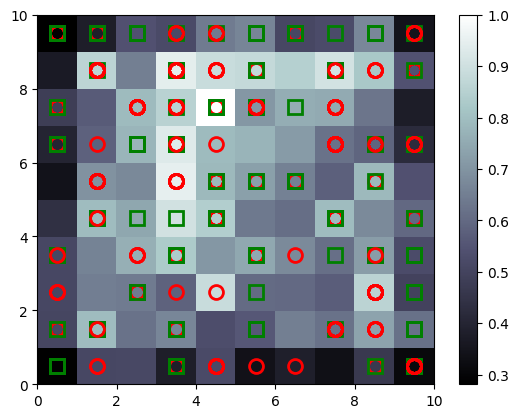

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i, x in enumerate(x):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()